<a href="https://colab.research.google.com/github/hayleypc/BPCA_HFF/blob/main/2024_BPCA_munging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# read in these files: /content/2024_holidayfarmfire.xlsx, /content/BPCA6_standards.csv, /content/sample_data, /content/BPCA_HPLC_LF.csv, /content/C_Mg_ha.csv,
# /content/Postfire Soils BPCA - LF_subset.csv, /content/cwd_rate_table.csv, /content/image.png, /content/lines.gpkg, /content/points.gpkg, /content/spatial_cwd.gpkg,
# /content/transect_data.gpkg

In [2]:
install.packages(c('data.table','ggplot2','magrittr','rstatix','plotrix','ggsignif',"googledrive",'openxlsx'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘Rcpp’




In [1]:
library(data.table)
library(ggplot2)
library(magrittr)
library(rstatix)
library(ggsignif)
library(plotrix)
library(googledrive)
library(openxlsx)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [2]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=8a476f957104bb75441564928c5bc84c&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYa3BQXzA5bURFWmZfS19SSHV3UEoxbkVMUVAzN0ZNNG03SzlxYmdCRlhhYmRvYmg2bUxJc2xZVUhpb191RnpZZyIsInN0YXRlIjoiOGE0NzZmOTU3MTA0YmI3NTQ0MTU2NDkyOGM1YmM4NGMifQ==


In [37]:
# bpca_dt <- fread('/content/BPCA_HPLC_LF.csv')
# standards_dt <- fread('/content/BPCA6_standards.csv')
LF_stoic_dt_old <- fread('/content/Postfire Soils BPCA - LF_subset.csv')

In [6]:
# https://docs.google.com/spreadsheets/d/1uoBy87pdp8sByoTocX6MGIIBpW9KIGC8oZWwzlbXj7Y/edit?usp=sharing

In [4]:
# Hawaii GEDI data ## even though it's not HI GEDI data
# https://drive.google.com/file/d/1UY3lxML0Y7bat_9-xEZQQHDkYRcODDZy/view?usp=drive_link
drive_download(file = as_id('1uoBy87pdp8sByoTocX6MGIIBpW9KIGC8oZWwzlbXj7Y'), path =  '/content/2024_holidayfarmfire.xlsx', overwrite = FALSE)
# gedi_sf <- st_read('/content/predictor_variables/Hawaii_GEDI_4A.gpkg')

ERROR: [1m[33mError[39m in `drive_download()`:[22m
[1m[22m[33m![39m Local `path` already exists and overwrite is `FALSE`:
[36m•[39m [34m/content/2024_holidayfarmfire.xlsx[39m


In [5]:
# https://drive.google.com/file/d/1tVMe4VeUT06QLF_iOirdcLZ_4aT-cQCg/view?usp=drive_link
drive_download(file = as_id('1tVMe4VeUT06QLF_iOirdcLZ_4aT-cQCg'), path =  '/content/cwd_rate_table.csv', overwrite = FALSE)

ERROR: [1m[33mError[39m in `drive_download()`:[22m
[1m[22m[33m![39m Local `path` already exists and overwrite is `FALSE`:
[36m•[39m [34m/content/cwd_rate_table.csv[39m


In [6]:
cwd_rate_table <- fread('/content/cwd_rate_table.csv')

In [7]:
SheetNames<-getSheetNames('/content/2024_holidayfarmfire.xlsx')
print(SheetNames)

data_list <- SheetNames %>%
             lapply(function(x){
                #Read the i'th sheet
             openxlsx::read.xlsx('/content/2024_holidayfarmfire.xlsx', x) %>% data.table
             })

names(data_list) <- SheetNames

[1] "Site Locations"         "Soil Samples"           "CWD"                   
[4] "Decay and burn classes" "Frac BPCA"              "BPCA Standards"        


In [8]:
standards_2_dt <- data_list[['BPCA Standards']][Treatment == 'standard']

In [9]:
standards_2_dt$stock_concentration_mg_per_ml <- c(1/800,1/400,1/200,1/100,1/50,1/10,1)*(2/3)
# standards_2_dt$stock_concentration_mg_per_ml_alt <- c(1/800,1/400,1/200,1/100,1/50,1/10,1)
standards_2_dt$PA_240_nm  <- standards_2_dt$`240_nm_PA`
standards_2_dt$PA_216_nm  <- standards_2_dt$`216_nm_PA`

In [10]:
# standards_dt %>% head
# lm('stock_concentration_mg_per_ml~PA_216_nm',standards_dt) %>% summary
conc_240_lm <- lm('stock_concentration_mg_per_ml~PA_240_nm',standards_2_dt)
conc_216_lm <- lm('stock_concentration_mg_per_ml~PA_216_nm',standards_2_dt)
conc_240_lm %>% summary
conc_216_lm %>% summary


Call:
lm(formula = "stock_concentration_mg_per_ml~PA_240_nm", data = standards_2_dt)

Residuals:
        1         2         3         4         5         6         7 
 0.010089  0.010557  0.009807  0.005208 -0.002146 -0.040517  0.007002 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.106e-02  8.600e-03  -1.285    0.255    
PA_240_nm    3.858e-08  1.288e-09  29.960 7.77e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02016 on 5 degrees of freedom
Multiple R-squared:  0.9945,	Adjusted R-squared:  0.9934 
F-statistic: 897.6 on 1 and 5 DF,  p-value: 7.77e-07



Call:
lm(formula = "stock_concentration_mg_per_ml~PA_216_nm", data = standards_2_dt)

Residuals:
        1         2         3         4         5         6         7 
 0.006833  0.007300  0.006870  0.003657 -0.002204 -0.026349  0.003894 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.507e-03  5.616e-03  -1.515     0.19    
PA_216_nm    1.731e-08  3.785e-10  45.731 9.44e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01323 on 5 degrees of freedom
Multiple R-squared:  0.9976,	Adjusted R-squared:  0.9971 
F-statistic:  2091 on 1 and 5 DF,  p-value: 9.441e-08


In [18]:
bpca_dt <- data_list[['BPCA Standards']]

bpca_dt$PA_240_nm  <- bpca_dt$`240_nm_PA`
bpca_dt$PA_216_nm  <- bpca_dt$`216_nm_PA`

In [19]:
 bpca_dt[BPCA_ID == 'R65 V22']$PA_240_nm <- NA #Has a reading of >1 in 240 (1.2)
 bpca_dt[BPCA_ID == 'R65 V22']

BPCA_ID,Sample_ID,Treatment,Fraction,Depth_upper,Depth_lower,Site,Burn_severity,240_nm_PA,216_nm_PA,notes,PA_240_nm,PA_216_nm
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
R65 V22,CL2 10-20 LF,control,LF,10,20,CL2,control,32555238,65637752,NA,NA,65637752


In [20]:
bpca_dt[,conc_240  := predict(conc_240_lm,data.frame(PA_240_nm=PA_240_nm))]
bpca_dt[,conc_216  := predict(conc_216_lm,data.frame(PA_216_nm= (PA_216_nm )))]
bpca_dt[Treatment!='standard',conc_216  := ((conc_216 ^2)/10)*sign(conc_216)]
bpca_dt[,conc_mean:= mean(c(conc_240[conc_240>0],conc_216[conc_216>0]),na.rm=T),by=1:nrow(bpca_dt)]

In [21]:
bpca_dt[!is.na(conc_mean)]$conc_mean %>% min

[1] 3.170635e-07

[1] 0.9912047

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 7 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


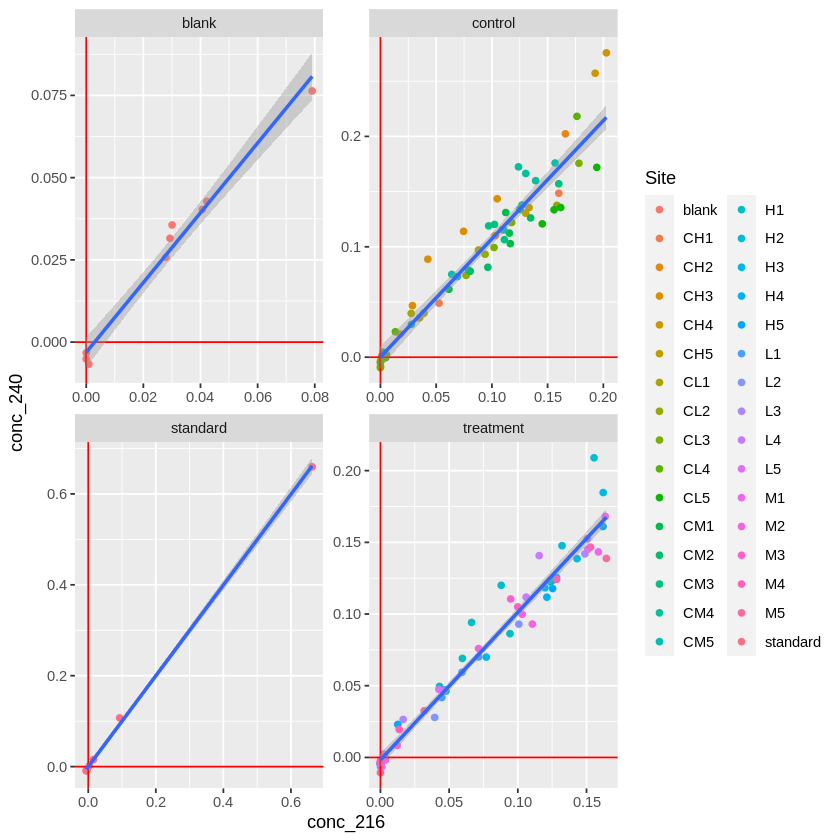

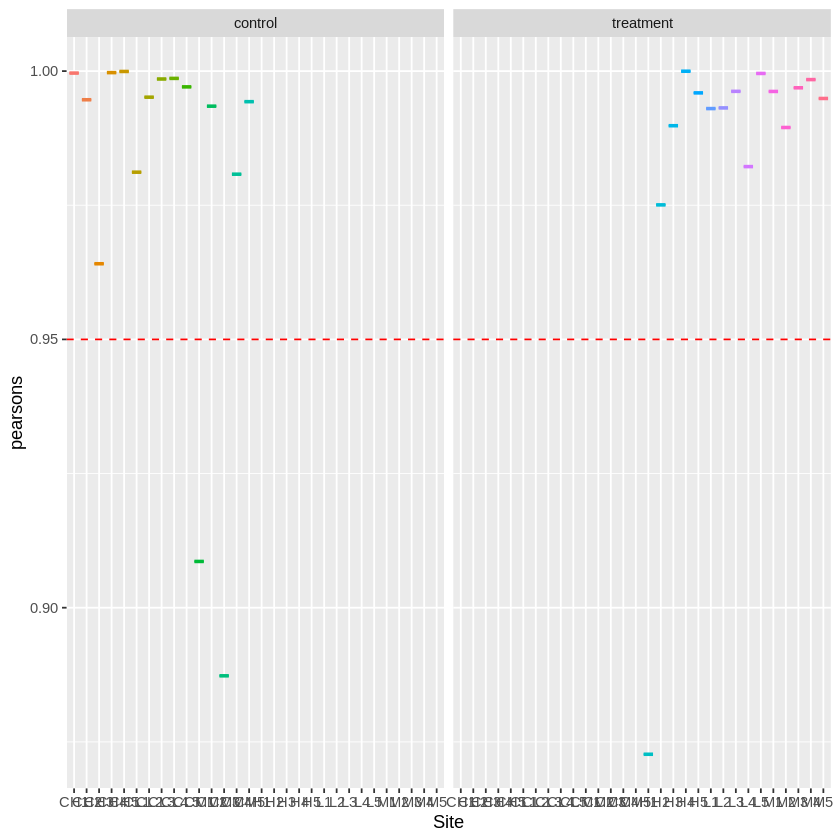

In [23]:
bpca_dt[Treatment=='standard',Site:='standard']
bpca_dt[Treatment=='blank',Site:='blank']
bpca_dt[,pearsons:=cor(conc_240[!is.na(conc_240) & !is.na(conc_216)],conc_216[!is.na(conc_240) & !is.na(conc_216)]),by = .(Site)]

# bpca_dt[pearsons < .95][,list(pearsons = pearsons[1]),by=Site]
bpca_dt[Treatment=='blank']$pearsons %>% mean
bpca_dt[ ] %>%
  ggplot(aes(x=conc_216 ,y=conc_240)) +
  geom_point(aes(color=Site))+
  # geom_abline(color='red')+
  geom_hline(yintercept = 0,color='red')+
    geom_vline(xintercept = 0,color='red')+

  geom_smooth(method='lm')+
    # xlim(-.05,0.01)+
    # ylim(-.05,0.01)+

  # geom_point(data=bpca_dt[conc_240<1 &Site == 'CL2'],method='lm',color='orange')+

  # geom_smooth(data=bpca_dt[conc_240<1 &Site == 'CL2'],method='lm',color='orange')+
  facet_wrap(Treatment~.,scales = 'free')

bpca_dt[Treatment %in% c('control','treatment')  ]  %>%
  ggplot(aes(y=pearsons,x=Site)) +
  geom_boxplot(aes(color=Site))+
  theme(legend.position = "none")  +
  geom_hline(yintercept = .95,color='red',linetype='dashed')+
  # geom_abline(color='red')+
  # geom_smooth(method='lm')+
  facet_wrap(Treatment~.)

In [26]:
bpca_dt[,.(conc_240,conc_216,conc_mean)]

conc_240,conc_216,conc_mean
<dbl>,<dbl>,<dbl>
0.0489071854,5.259535e-02,5.075127e-02
0.0210096226,1.778472e-02,1.939717e-02
0.1485253993,1.600520e-01,1.542887e-01
NA,NA,NaN
-0.0031479951,2.877661e-04,2.877661e-04
0.1156152011,1.093653e-01,1.124903e-01
0.1101276410,1.029391e-01,1.065334e-01
0.2023328630,1.659853e-01,1.841591e-01
0.1140240297,7.463108e-02,9.432756e-02


In [27]:
bpca_dt[,Depth := paste0(Depth_upper,'-',Depth_lower) %>%  factor(levels= c('0-5','5-10','10-20','10-30','20-30','blank'))]

bpca_dt[is.na(Depth),Depth:='blank']

In [30]:
(bpca_dt[!(Treatment %in% c('blank','standard'))]$conc_mean == 0) %>% table

.
FALSE 
  125 

In [31]:
LF_stoic_dt <- data_list[["Frac BPCA"]]
LF_stoic_dt[,Depth := paste0(depth_upper_cm %>% as.numeric,'-',depth_lower_cm %>% as.numeric) %>%  factor(levels= c('0-5','5-10','10-20','10-30','20-30','blank'))]

Warning message in depth_upper_cm %>% as.numeric:
“NAs introduced by coercion”
Warning message in depth_lower_cm %>% as.numeric:
“NAs introduced by coercion”


In [32]:
LF_stoic_dt[,Depth := factor(Depth, levels = c('0-5','5-10','10-20','20-30'))]

In [35]:
LF_stoic_dt_old %>% print

Null data.table (0 rows and 0 cols)


In [38]:
join_dt <- LF_stoic_dt_old[,.(Site,Depth,Fract,bpca_starting_mass_mg)]

In [92]:
bpca_dt %>% names
# bpca_dt %>% head
bpca_dt$Treatment %>% table
bpca_exp_dt <- bpca_dt[Treatment %in% c('control','treatment'),.(Treatment,Fraction,Depth,Depth_upper,Depth_lower,Site,Burn_severity,conc_240,conc_216,conc_mean,pearsons)]

standards_dt <- bpca_dt[Treatment %in% c('standard','control','treatment'),.(Treatment,Fraction,Depth,Depth_upper,Depth_lower,Site,Burn_severity,PA_240_nm,PA_216_nm,conc_240,conc_216,conc_mean,pearsons)]

[1] "BPCA_ID"       "Sample_ID"     "Treatment"     "Fraction"     
 [5] "Depth_upper"   "Depth_lower"   "Site"          "Burn_severity"
 [9] "240_nm_PA"     "216_nm_PA"     "notes"         "PA_240_nm"    
[13] "PA_216_nm"     "conc_240"      "conc_216"      "conc_mean"    
[17] "pearsons"      "Depth"

.
    blank   control  standard treatment 
       10        64         7        69 

In [41]:
LF_stoic_dt <- merge(LF_stoic_dt,join_dt,by=c('site','Depth','fraction'),all = T)

In [94]:
names(bpca_exp_dt) <- names(bpca_exp_dt) %>% toupper
names(LF_stoic_dt) <- names(LF_stoic_dt) %>% toupper

In [140]:
which(names(LF_stoic_dt) == 'ACCEPT')

[1] 15

In [141]:
full_bpca_exp_dt <- merge(bpca_exp_dt,LF_stoic_dt[,c(1:4,7:12,15,length(names(LF_stoic_dt))),with=F],by=c('SITE','FRACTION','DEPTH','BURN_SEVERITY'),all=T)

In [99]:
names(standards_dt)  <-  names(standards_dt) %>% toupper

In [119]:
standards_dt$test <- NULL

In [142]:

# LF_stoic_dt
# bpca_dt
# cwd_rate_table

write.csv (standards_dt ,'/content/standards.csv')

write.csv (full_bpca_exp_dt ,'/content/full_bpca_exp_dt.csv')

In [121]:
folder_id <- "1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm"
# https://drive.google.com/drive/folders/1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm?usp=drive_link

file_path <- '/content/standards.csv'

drive_upload(media = '/content/standards.csv' , path = as_id(folder_id),overwrite=TRUE)

File trashed:

• standards.csv <id: 1IQGkNctgR6F0mwwGoHb86dFHlH77QCSC>

Local file:

• /content/standards.csv

Uploaded into Drive file:

• standards.csv <id: 1zNR-qpUKPnO6OpArQYuuweoMG505F7pw>

With MIME type:

• text/csv



In [143]:
folder_id <- "1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm"
# https://drive.google.com/drive/folders/1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm?usp=drive_link

file_path <- '/content/full_bpca_exp_dt.csv'

drive_upload(media = '/content/full_bpca_exp_dt.csv' , path = as_id(folder_id),overwrite=TRUE)

File trashed:

• full_bpca_exp_dt.csv <id: 11s1Do0Dy8_KOkKL5HUYjwTiVflD9hiyP>

Local file:

• /content/full_bpca_exp_dt.csv

Uploaded into Drive file:

• full_bpca_exp_dt.csv <id: 1664xblDUK5yG4zzhhXXomgwK-wR6p31b>

With MIME type:

• text/csv



In [ ]:
# https://drive.google.com/drive/folders/1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm?usp=drive_link

In [136]:
(drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == 'full_bpca_exp_dt.csv']$id


<drive_id[1]>
[1] 11s1Do0Dy8_KOkKL5HUYjwTiVflD9hiyP